In [1]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import os
import requests
import re

from Bio.PDB.MMCIF2Dict import MMCIF2Dict

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/mchrnwsk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mchrnwsk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read in pdb codes to scrape information for

In [7]:
pdb = pd.read_csv("20240827_pdb_codes.csv", sep=",", header=0).reset_index(drop=True)
pdb.columns=["pdb"]
pdb_codes = pd.DataFrame([row["pdb"].lower() for i, row in pdb.iterrows()])
pdb_codes.columns=["pdb"]

In [8]:
new_data = pd.DataFrame(columns=["pdb","picture_path", "chains", "authors", "classification", "classification_suggested", "classification_suggested_reason", "subtitle", "tags", "keywords", "release_date", "publication", "publication_ref",  "publication_country", "abstract", "crystal_structure", "symmetry", "exptl_method", "formula_weight", "synthesis_comment", "review", "previous_design", "next_design"])

In [188]:
pdb_dir_path = "./data/raw_structures/"
cif_dir_path = "./data/cif_files/"

# Suggestions for classification from DNW's original data in the ["Brief history (...)"](10.1016/j.jmb.2021.167160) paper

In [189]:
dek_data = pd.read_json("data/merged_designs_20220525_and_raw_CSV.json").sort_values(by="PDB").reset_index(drop=True)

In [190]:
dek_data

,PDB,Data,Classification,Keywords,Date,Authors,DOI,Pubmed ID
0,1AL1,"{'rcsb_id': '1AL1', 'em_3d_reconstruction': No...",original de novo design,SYNTHETIC PROTEIN MODEL,1990-07-02,"C.P.HILL,D.H.ANDERSON,L.WESSON,W.F.DEGRADO,D.E...",http://dx.doi.org/10.1126/science.2382133,2382133
1,1BB1,"{'rcsb_id': '1BB1', 'em_3d_reconstruction': No...",original de novo design,DE NOVO PROTEIN DESIGN,1998-04-28,"S.NAUTIYAL,T.ALBER ...",http://dx.doi.org/10.1110/ps.8.1.84,10210186
2,1BYZ,"{'rcsb_id': '1BYZ', 'em_3d_reconstruction': No...",relative of another de novo design,DE NOVO PROTEIN,1998-10-20,"G.G.PRIVE,D.H.ANDERSON,L.WESSON,D.CASCIO,D.EIS...",http://dx.doi.org/10.1110/ps.8.7.1400,10422828
3,1COS,"{'rcsb_id': '1COS', 'em_3d_reconstruction': No...",original de novo design,ALPHA-HELICAL BUNDLE,1993-01-22,"B.LOVEJOY,S.CHOE,D.CASCIO,D.K.MCRORIE,W.DEGRAD...",http://dx.doi.org/10.1126/science.8446897,8446897
4,1DJF,"{'rcsb_id': '1DJF', 'em_3d_reconstruction': No...","small, non-systematic, and other",DE NOVO PROTEIN,1999-12-03,"R.MONTSERRET,M.J.MCLEISH,A.BOCKMANN,C.GEOURJON...",http://dx.doi.org/10.1021/bi000208x,10913242
5,1EC5,"{'rcsb_id': '1EC5', 'em_3d_reconstruction': No...",original de novo design,DE NOVO PROTEIN,2000-01-25,S.GEREMIA ...,http://dx.doi.org/10.1073/pnas.97.12.6298,10841536
6,1FME,"{'rcsb_id': '1FME', 'em_3d_reconstruction': No...",relative of another de novo design,DE NOVO PROTEIN,2000-08-16,"C.A.SARISKY,S.L.MAYO ...",http://dx.doi.org/10.1006/jmbi.2000.4345,11292351
7,1FMH,"{'rcsb_id': '1FMH', 'em_3d_reconstruction': No...",original de novo design,TRANSCRIPTION,2000-08-17,"D.N.MARTI,I.JELESAROV,H.R.BOSSHARD ...",http://dx.doi.org/10.1021/bi001242e,11041845
8,1FSD,"{'rcsb_id': '1FSD', 'em_3d_reconstruction': No...",original de novo design,NOVEL SEQUENCE,1997-06-09,"B.I.DAHIYAT,S.L.MAYO ...",http://dx.doi.org/10.1126/science.278.5335.82,9311930
9,1FSV,"{'rcsb_id': '1FSV', 'em_3d_reconstruction': No...",relative of another de novo design,BETA BETA ALPHA MOTIF,1997-10-26,"B.I.DAHIYAT,S.L.MAYO ...",http://dx.doi.org/10.1126/science.278.5335.82,9311930


In [191]:
dek_data["PDB"] = dek_data["PDB"].str.lower()

In [192]:
dek_data

,PDB,Data,Classification,Keywords,Date,Authors,DOI,Pubmed ID
0,1al1,"{'rcsb_id': '1AL1', 'em_3d_reconstruction': No...",original de novo design,SYNTHETIC PROTEIN MODEL,1990-07-02,"C.P.HILL,D.H.ANDERSON,L.WESSON,W.F.DEGRADO,D.E...",http://dx.doi.org/10.1126/science.2382133,2382133
1,1bb1,"{'rcsb_id': '1BB1', 'em_3d_reconstruction': No...",original de novo design,DE NOVO PROTEIN DESIGN,1998-04-28,"S.NAUTIYAL,T.ALBER ...",http://dx.doi.org/10.1110/ps.8.1.84,10210186
2,1byz,"{'rcsb_id': '1BYZ', 'em_3d_reconstruction': No...",relative of another de novo design,DE NOVO PROTEIN,1998-10-20,"G.G.PRIVE,D.H.ANDERSON,L.WESSON,D.CASCIO,D.EIS...",http://dx.doi.org/10.1110/ps.8.7.1400,10422828
3,1cos,"{'rcsb_id': '1COS', 'em_3d_reconstruction': No...",original de novo design,ALPHA-HELICAL BUNDLE,1993-01-22,"B.LOVEJOY,S.CHOE,D.CASCIO,D.K.MCRORIE,W.DEGRAD...",http://dx.doi.org/10.1126/science.8446897,8446897
4,1djf,"{'rcsb_id': '1DJF', 'em_3d_reconstruction': No...","small, non-systematic, and other",DE NOVO PROTEIN,1999-12-03,"R.MONTSERRET,M.J.MCLEISH,A.BOCKMANN,C.GEOURJON...",http://dx.doi.org/10.1021/bi000208x,10913242
5,1ec5,"{'rcsb_id': '1EC5', 'em_3d_reconstruction': No...",original de novo design,DE NOVO PROTEIN,2000-01-25,S.GEREMIA ...,http://dx.doi.org/10.1073/pnas.97.12.6298,10841536
6,1fme,"{'rcsb_id': '1FME', 'em_3d_reconstruction': No...",relative of another de novo design,DE NOVO PROTEIN,2000-08-16,"C.A.SARISKY,S.L.MAYO ...",http://dx.doi.org/10.1006/jmbi.2000.4345,11292351
7,1fmh,"{'rcsb_id': '1FMH', 'em_3d_reconstruction': No...",original de novo design,TRANSCRIPTION,2000-08-17,"D.N.MARTI,I.JELESAROV,H.R.BOSSHARD ...",http://dx.doi.org/10.1021/bi001242e,11041845
8,1fsd,"{'rcsb_id': '1FSD', 'em_3d_reconstruction': No...",original de novo design,NOVEL SEQUENCE,1997-06-09,"B.I.DAHIYAT,S.L.MAYO ...",http://dx.doi.org/10.1126/science.278.5335.82,9311930
9,1fsv,"{'rcsb_id': '1FSV', 'em_3d_reconstruction': No...",relative of another de novo design,BETA BETA ALPHA MOTIF,1997-10-26,"B.I.DAHIYAT,S.L.MAYO ...",http://dx.doi.org/10.1126/science.278.5335.82,9311930


In [193]:
dek_class = dek_data[["PDB", "Classification"]]

In [194]:
dek_class.rename(columns={"PDB":"pdb", "Classification":"classification"}, inplace=True)

/tmp/ipykernel_2471923/3464038975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dek_class.rename(columns={"PDB":"pdb", "Classification":"classification"}, inplace=True)


dek_class.to_csv("dek_classification.csv", sep=",")

# Download cif files to scrape

In [195]:
success = 0
fail = 0


def download_cif(pdb, path):
    cif_url = "https://files.rcsb.org/view/"+pdb+".cif"
    local_file_path = path+pdb+".cif"
    if os.path.isfile(local_file_path):
        pass
    else:
        response = requests.get(cif_url)
        if response.status_code == 200:
            with open(local_file_path, 'wb') as f:
                f.write(response.content)
            print(pdb+" downloaded.")
        else:
            fail+=1
            print("Failed to download "+pdb)

In [199]:
class_dict = {
    "small, non-systematic, and other":["minimal"],
    "engineered":["engineered"],
    "D.N. Woolfson":["rational"],
    "C.W. Wood":["computational"],
    "D. Baker":["computational", "deep-learning based"],
    "W.F. DeGrado":["computational", "consensus"], #"minimal", "rational", "physics-based"
    "M.H. Hecht":["minimal"],
    "J.S. Richardson":["minimal"],
    "D.C. Richardson":["minimal"],
    "P.L. Dutton":["minimal"],
    "R.S. Hodges":["minimal"],
    "L. Regan":["rational", "consensus"],
    "T. Alber":["rational", "computational", "physics-based"],
    "V.P. Conticello":["rational"],
    "P.S. Kim":["rational", "computational", "physics-based"],
    "V.L. Pecoraro":["rational"],
    "T. Kortemme":["rational"],
    "L. Serrano":["rational"],
    "J.M. Berg":["consensus"],
    "B. Imperiali":["consensus"],
    "Z.-Y. Peng":["consensus"],
    "A. Pluckthun":["consensus"],
    "A.M. Buckle":["consensus"],
    "M. Lehmann":["consensus"],
    "P. Minard":["consensus"],
    "O. Rackham":["consensus"],
    "P.B. Harbury":["computational", "physics-based"],
    "B.R. Donald":["computational"],
    "A.R. Thomson":["computational"],
    "S.L. Mayo":["computational"]
    }

for i, pdb_code in new_pdb.iterrows():
    download_cif(pdb_code[0], cif_dir_path)

# "Get" functions - data scraping

In [217]:
summary = {}

In [197]:
def get_picture_path(pdb):
    picture_path = ""
    try:
        picture_path = "https://cdn.rcsb.org/images/structures/" + pdb + "_assembly-1.jpeg"
        response = requests.get(picture_path)
        if response.status_code == 200:
            pass
        else:
            print(pdb + " doesn't have valid picture.")
            summary[pdb].append("Invalid picture.")
            picture_path = ""
    except:
        picture_path = ""

    if (not picture_path) or (picture_path == ""):
        summary[pdb].append("Invalid picture.")
        
    return picture_path

In [198]:
def get_authors(pdb, cif_dict):
    try:
        auth = []
        authors = []
        i = 0
        while i < 100000:
            try:
                if cif_dict["_citation_author.citation_id"][i] == 'primary':
                    auth.append(cif_dict["_citation_author.name"][i].strip())
                    i += 1
                else:
                    break
            except IndexError:
                break
        for author in auth:
            forename = author.split(",")[1].strip()
            surname = author.split(",")[0].strip()
            authors.append({"forename":forename, "surname": surname})
    except:
        authors = []

    if not authors:
        summary[pdb].append("Missing authors.")
        
    return authors

In [200]:
def get_classification(pdb, authors, class_dict):
    classification = "unknown"
    classification_suggested = []
    classification_suggested_reason = []
    
    dek_pdb = dek_data[dek_data["PDB"] == pdb]
    if len(dek_pdb) != 0:
        dek_class = dek_pdb["Classification"].values[0]
        try:
            classification_suggested = class_dict[dek_class]
        except:
            classification_suggested = []
        classification_suggested_reason = ["Dek's classification: " + dek_class]

    for author in authors:
        key = author["forename"] + " " + author["surname"]
        try:
            classification_suggested += class_dict[key]
            classification_suggested_reason += ["Author is: " + key]
        except:
            pass

    if not classification_suggested:
        summary[pdb].append("No suggestion for classification.")
        
    return classification, classification_suggested, classification_suggested_reason

In [201]:
def get_release_date(pdb, cif_dict):
    try:
        release_date = cif_dict["_pdbx_audit_revision_history.revision_date"][0].strip()
    except:
        release_date = '1900-01-01'

    if (not release_date) or (release_date == ""):
        summary[pdb].append("No release date.")
        
    return release_date

In [202]:
def get_publication(pdb, cif_dict):
    publication = ""
    publication_country = ""
    publication_fields = []
    publication_ref = {"DOI":"", "PubMed":"", "CSD":"", "ISSN":"", "ASTM":""}
    
    try:
        publication_title = "\"" + cif_dict["_citation.title"][0].strip().rstrip('.') + "\""
    except:
        publication_title = ""
    try:
        publication_journal_abbrev = cif_dict["_citation.journal_abbrev"][0]
    except:
        publication_journal_abbrev = ""
        
    if ("to be published" in publication_journal_abbrev.lower()) or (publication_journal_abbrev == "") or (not publication_journal_abbrev) or ("tba" in publication_title.lower()):
        summary[pdb].append("Publication \"to be published\" ")
        publication = "To be published"
    
    else:
        try:
            publication_journal_volume = cif_dict["_citation.journal_volume"][0].strip().rstrip('.')
        except:
            publication_journal_volume = ""
        try:
            publication_page_first = cif_dict["_citation.page_first"][0].strip().rstrip('.')
        except:
            publication_page_first = ""
        try:
            publication_page_last = cif_dict["_citation.page_last"][0].strip().rstrip('.')
        except:
            publication_page_last = ""
        try:
            publication_id_astm = cif_dict["_citation.journal_id_ASTM"][0].strip().rstrip('.')
        except:
            publication_id_astm = ""
        try:
            publication_country = cif_dict["_citation.country"][0].strip()
        except:
            publication_country = ""
        try:
            publication_id_issn = cif_dict["_citation.journal_id_ISSN"][0].strip().rstrip('.')
        except:
            publication_id_issn = ""
        try:
            publication_id_csd = cif_dict["_citation.journal_id_CSD"][0].strip().rstrip('.')
        except:
            publication_id_csd = ""
        try:
            publication_id_pubmed = cif_dict["_citation.pdbx_database_id_PubMed"][0].strip().rstrip('.')
        except:
            publication_id_pubmed = ""
        try:
            publication_id_doi = cif_dict["_citation.pdbx_database_id_DOI"][0].strip().rstrip('.')
        except:
            publication_id_doi = ""

        if (not publication_page_last or publication_page_last == "" or publication_page_last == "?"):
            if (not publication_page_first or publication_page_first == "" or publication_page_first == "?"):
                publication_page_range = ""
            else:
                publication_page_range = publication_page_first
        else:
            if (not publication_page_first or publication_page_first == "" or publication_page_first == "?"):
                publication_page_range = publication_page_last
            else:
                publication_page_range = publication_page_first + "-" + publication_page_last
                
        publication_fields = [publication_title, publication_journal_abbrev, publication_journal_volume, publication_page_range]
        for i in publication_fields:
            if (not i) or (i == "") or (i == "?"):
                pass
            else:
                if not publication or publication == "":
                    publication = i
                else:
                    publication = publication + ", " + i
        
        publication_ref["DOI"] = (publication_id_doi if publication_id_doi != "?" else "")
        publication_ref["PubMed"] = (publication_id_pubmed if publication_id_pubmed != "?" else "")
        publication_ref["CSD"] = (publication_id_csd if publication_id_csd != "?" else "")
        publication_ref["ISSN"] = (publication_id_issn if publication_id_issn != "?" else "")
        publication_ref["ASTM"] = (publication_id_astm if publication_id_astm != "?" else "")

    if (publication == "") or (not publication) or (publication == "To be published"):
        summary[pdb].append("No publication citation info.")

    try:
        if (publication_ref["DOI"] == "") or (not publication_ref["DOI"]):
            summary[pdb].append("Missing DOI")
    except:
        pass

    return publication, publication_ref, publication_country

In [203]:
def get_chains(pdb, cif_dict):
    try:
        i = 0
        chains = []
        seq_unnat = cif_dict["_entity_poly.pdbx_seq_one_letter_code"]
        seq_nat = cif_dict["_entity_poly.pdbx_seq_one_letter_code_can"]
        seq_id = cif_dict["_entity_poly.pdbx_strand_id"]
        seq_source = ""
        try:
            seq_source = cif_dict["_pdbx_entity_src_syn.organism_scientific"]
        except:
            try:
                seq_source = cif_dict["_entity_src_gen.pdbx_gene_src_scientific_name"]
            except:
                seq_source = "unknown"
        while i < 100000:
            try:
                chain_seq_unnat = seq_unnat[i].strip().replace("\n", "")
                chain_seq_nat = seq_nat[i].strip().replace("\n", "")
                chain_id = seq_id[i].strip()
                if ("unknown" in seq_source) or ("unidentified" in seq_source):
                    chain_source = "unknown"
                    chain_type = "U"
                    
                else:
                    chain_source = seq_source[i].strip()
                    if "?" in chain_source.lower():
                        chain_source = "unknown"
                        chain_type = "U"
                    elif "synthetic construct" in chain_source.lower() or "artificial" in chain_source.lower():
                        chain_type = "D"
                    else:
                        chain_type = "N"
                        
                chain_length = len(seq_nat[i])
                chains.append({"chain_id": chain_id, "chain_source": chain_source, "chain_type": chain_type, "chain_seq_unnat": chain_seq_unnat, "chain_seq_nat": chain_seq_nat, "chain_length": chain_length})
                i+=1
            except IndexError:
                break
    except:
        chains = []

    if not chains:
        summary[pdb].append("Missing sequence information.")
    
    return chains

In [204]:
def get_tags(pdb, cif_dict):
    tags = []
    try:
        subtitle = [title.capitalize().strip().rstrip('.') for title in cif_dict["_struct.title"]][0]
    except:
        summary[pdb].append("No keyword.")
        subtitle = ""
    try:
        keyword_struct_pdbx_descriptor = [keyword.lower().strip().rstrip('.') for keyword in cif_dict["_struct_keywords.pdbx_keywords"]]
    except:
        keyword_struct_pdbx_descriptor = []
    try:
        keyword_text = [keyword.lower().strip().rstrip('.') for keyword in cif_dict["_struct_keywords.text"][0].split(",")]
    except:
        keyword_text = []
    try:
        for tag in (keyword_struct_pdbx_descriptor+keyword_text):
            if tag not in tags:
                tags.append(tag.strip())
    except:
        tags = []

    if (not subtitle) or (subtitle == ""):
        summary[pdb].append("No subtitle.")
    
    if not tags:
        summary[pdb].append("No tags.")

    tags = list(set(tags))
    
    return subtitle, tags

In [205]:
def get_xray(pdb, cif_dict):
    try:
        xray_cell_length_a = cif_dict["_cell.length_a"][0].strip()
        xray_cell_length_b = cif_dict["_cell.length_b"][0].strip()
        xray_cell_length_c = cif_dict["_cell.length_c"][0].strip()
    except:
        xray_cell_length_a = ""
        xray_cell_length_b = ""
        xray_cell_length_c = ""
    try:
        xray_cell_angle_alpha = cif_dict["_cell.angle_alpha"][0].strip()
        xray_cell_angle_beta = cif_dict["_cell.angle_beta"][0].strip()
        xray_cell_angle_gamma = cif_dict["_cell.angle_gamma"][0].strip()
    except:
        xray_cell_angle_alpha = ""
        xray_cell_angle_beta = ""
        xray_cell_angle_gamma = ""
        
    crystal_structure = {"length_a":xray_cell_length_a, "length_b":xray_cell_length_b, "length_c":xray_cell_length_c, "angle_a":xray_cell_angle_alpha, "angle_b":xray_cell_angle_beta, "angle_g":xray_cell_angle_gamma}

    for key, value in crystal_structure.items():
        if (not value) or (value == "") or (value == "?"):
            crystal_structure[key] = ""
    
    for key, value in crystal_structure.items():
        if (not value) or (value == ""):
            summary[pdb].append("Missing crystal structure information.")
            break
    
    return crystal_structure

In [206]:
def get_exptl(pdb, cif_dict):
    try:
        exptl_method = [exptl.upper().strip().rstrip('.') for exptl in cif_dict["_exptl.method"]]
    except:
        exptl_method = ""
    try:
        formula_weight = cif_dict["_entity.formula_weight"][0].strip()
    except:
        formula_weight = ""
    try:
        synthesis_comment = cif_dict["_pdbx_entity_src_syn.details"][0].capitalize().strip().rstrip('.')
    except:
        synthesis_comment =  ""

    if (not exptl_method) or (exptl_method == ""):
        summary[pdb].append("Missing exptl_method information.")
    if (not formula_weight) or (formula_weight == ""):
        summary[pdb].append("Missing formula_weight information.")
    if (not synthesis_comment) or (synthesis_comment == ""):
        summary[pdb].append("Missing synthesis_comment information.")
    
    return exptl_method, formula_weight, synthesis_comment

In [208]:
def get_abstract(pdb):
    try:
        url = "https://www.rcsb.org/structure/"+pdb
        with urllib.request.urlopen(url) as response:
            xml_content = response.read()
        soup = BeautifulSoup(xml_content, "html.parser")
        text = soup.text
        # Extract abstract
        abstract_match = re.search(r"PubMed Abstract:\xa0([^&]+)", text)
        if abstract_match:
            abstract = abstract_match.group(1)
        else:
            abstract = "No description found."
    except:
        abstract = "No description found."

    if (not abstract) or (abstract == "") or ("abctract" == "No description found."):
        summary[pdb].append("No abstract description found.")
    
    return abstract

In [107]:
def get_pdb_string(pdb):
    file_path = pdb_dir_path+pdb.upper()+".pdb"
    pdb_string_list = []
    try:
        with open(file_path, 'r') as pdb_file:
            for line in pdb_file:
                if line.startswith('ATOM') or line.startswith('HETATM'):
                    pdb_string_list.append(line.strip())
    except:
        pdb_string_list = []

    if (not pdb_string_list):
        summary[pdb].append("No pdb string.")
    
    return pdb_string_list

In [210]:
def extract_keywords_nltk(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word.lower() for word in word_tokens if word.lower() not in stop_words and word.isalnum()]
    return list(set(filtered_words))

In [211]:
def get_symmetry(pdb, cif_dict):
    try:
        symmetry = cif_dict["_symmetry.space_group_name_H-M"][0]
    except:
        symmetry = ""
    
    if (not symmetry) or (symmetry == ""):
        summary[pdb].append("Missing symmetry information.")
    
    return symmetry

In [213]:
def fill_data(data, pdb):
    summary[pdb] = []
    
    try:
        cif_dict = MMCIF2Dict(cif_dir_path+pdb.upper()+".cif")
    except:
        try:
            cif_dict = MMCIF2Dict(cif_dir_path+pdb.lower()+".cif")
        except:
            print(pdb+" file not found.")
            
            index = len(data.index)
            pdb_data = {"pdb":None, "picture_path":None, "chains":None, "authors":None, 
                "classification":None, "classification_suggested":None, "classification_suggested_reason":None, 
                "subtitle":None, "tags":None, "keywords":None, "release_date":None, 
                "publication":None, "publication_ref":None, "publication_country":None,
                "abstract":None, "crystal_structure":None, "symmetry":None,
                "exptl_method":None, "formula_weight":None, "synthesis_comment":None, 
                "review":None}
            for key, value in pdb_data.items():
                data.at[index, key] = value
            return data

    picture_path = get_picture_path(pdb)
    authors = get_authors(pdb, cif_dict)
    classification, classification_suggested, classification_suggested_reason = get_classification(pdb, authors, class_dict)
    release_date = get_release_date(pdb, cif_dict)
    publication, publication_ref, publication_country = get_publication(pdb, cif_dict)
    chains = get_chains(pdb, cif_dict)
    subtitle, tags = get_tags(pdb, cif_dict)
    crystal_structure = get_xray(pdb, cif_dict)
    symmetry = get_symmetry(pdb, cif_dict)
    exptl_method, formula_weight, synthesis_comment = get_exptl(pdb, cif_dict)
    review = True
    abstract = get_abstract(pdb)
    keywords = extract_keywords_nltk(abstract)
    
    pdb_data = {"pdb":pdb, "picture_path":picture_path, "chains":chains, "authors":authors, 
                "classification":classification, "classification_suggested":classification_suggested, "classification_suggested_reason":classification_suggested_reason, 
                "subtitle":subtitle, "tags":tags, "keywords":keywords, "release_date":release_date, 
                "publication":publication, "publication_ref":publication_ref, "publication_country":publication_country,
                "abstract":abstract, "crystal_structure":crystal_structure, "symmetry":symmetry,
                "exptl_method":exptl_method, "formula_weight":formula_weight, "synthesis_comment":synthesis_comment, 
                "review":review}
    
    for key in pdb_data:
        if pdb_data[key] == "?":
            pdb_data[key] = ""
        try:
            pdb_data[key] = pdb_data[key].replace("\n", " ")
        except:
            continue

    index = len(data.index)
    for key, value in pdb_data.items():
        data.at[index, key] = value
    
    return data

# Fill data and save

In [111]:
for i, pdb_code in pdb_codes["pdb"].items():
    print(str(i) + "/" + str(len(pdb_codes)-1))
    data = fill_data(data, pdb_code)

0/1585
1/1585
2/1585
3/1585
4/1585
6/1585
7/1585
8/1585
9/1585
10/1585
11/1585
12/1585
13/1585
14/1585
15/1585
16/1585
17/1585
18/1585
21/1585
23/1585
24/1585
26/1585
27/1585
29/1585
30/1585
32/1585
33/1585
34/1585
35/1585
37/1585
38/1585
39/1585
41/1585
43/1585
45/1585
46/1585
47/1585
48/1585
49/1585
50/1585
52/1585
54/1585
56/1585
58/1585
61/1585
62/1585
63/1585
66/1585
67/1585
69/1585
70/1585
72/1585
73/1585


In [112]:
data = data.sort_values("pdb").reset_index(drop=True)
data

,pdb,picture_path,chains,authors,classification,classification_suggested,classification_suggested_reason,subtitle,tags,keywords,...,abstract,related_pdb,crystal_structure,symmetry,exptl_method,formula_weight,synthesis_comment,review,previous_design,next_design
0,7lxp,https://cdn.rcsb.org/images/structures/7lxp_as...,"[{'chain_id': 'A,B,C,D,E,F', 'chain_type': 'D'...","[{'forename': 'S.D.', 'surname': 'Melton'}, {'...",unknown,[],[],Collagen mimetic peptide with an xaa-position ...,"[biosynthetic protein, collagen, aza-amino acid]","[found, description]",...,No description found.,[],"{'length_a': '51.139', 'length_b': '19.520', '...",P 1 21 1,[X-RAY DIFFRACTION],2720.884,,True,NaN,NaN
1,7lxq,https://cdn.rcsb.org/images/structures/7lxq_as...,"[{'chain_id': 'A,B,C', 'chain_type': 'D', 'cha...","[{'forename': 'S.D.', 'surname': 'Melton'}, {'...",unknown,[],[],Collagen mimetic peptide with a yaa-position a...,"[biosynthetic protein, collagen, aza-amino aci...","[found, description]",...,No description found.,[7lxp],"{'length_a': '116.871', 'length_b': '19.477', ...",C 1 2 1,[X-RAY DIFFRACTION],2720.884,,True,NaN,NaN
2,7n2y,https://cdn.rcsb.org/images/structures/7n2y_as...,"[{'chain_id': 'A', 'chain_type': 'D', 'chain_s...","[{'forename': 'T.B.J.', 'surname': 'Pinter'}, ...",unknown,[rational],[Author is: V.L. Pecoraro],Crystal structure of a de novo three-stranded ...,"[biosynthetic protein, three-straded coiled co...","[metal, ii, evolution, implicated, similar, re...",...,The human long interspersed nuclear element 1 ...,[],"{'length_a': '38.328', 'length_b': '38.328', '...",H 3 2,[X-RAY DIFFRACTION],4104.785,,True,NaN,NaN
3,7n2z,https://cdn.rcsb.org/images/structures/7n2z_as...,"[{'chain_id': 'A', 'chain_type': 'D', 'chain_s...","[{'forename': 'T.B.J.', 'surname': 'Pinter'}, ...",unknown,[rational],[Author is: V.L. Pecoraro],Crystal structure of a de novo three-stranded ...,"[desinged protein, heavy metal sites in protei...","[metal, ii, evolution, implicated, similar, re...",...,The human long interspersed nuclear element 1 ...,[],"{'length_a': '38.130', 'length_b': '38.130', '...",H 3 2,[X-RAY DIFFRACTION],4104.785,,True,NaN,NaN
4,7n3t,https://cdn.rcsb.org/images/structures/7n3t_as...,"[{'chain_id': 'A,B', 'chain_type': 'N', 'chain...","[{'forename': 'L.', 'surname': 'Cao'}, {'foren...",unknown,"[computational, deep-learning based]",[Author is: D. Baker],Trka ecd complex with designed miniprotein ligand,"[complex, de novo protein]","[diagnostic, strengths, targeted, vast, region...",...,The design of proteins that bind to a specific...,"[7n1k, 7n1j, 7opb]","{'length_a': '42.203', 'length_b': '205.695', ...",P 1 21 1,[X-RAY DIFFRACTION],39318.297,,True,NaN,NaN
5,7ome,https://cdn.rcsb.org/images/structures/7ome_as...,"[{'chain_id': 'A', 'chain_type': 'D', 'chain_s...","[{'forename': 'A.', 'surname': 'Schenkmayerova...",unknown,[],[],Azacoelenterazine-bound renilla-type engineere...,"[luminescent protein, bioluminscence, azacoele...","[found, description]",...,No description found.,[],"{'length_a': '43.076', 'length_b': '64.487', '...",P 21 21 21,[X-RAY DIFFRACTION],35970.699,,True,NaN,NaN
6,7on6,https://cdn.rcsb.org/images/structures/7on6_as...,"[{'chain_id': 'A', 'chain_type': 'D', 'chain_s...","[{'forename': 'S.M.L.', 'surname': 'Wouters'},...",unknown,[],[],Crystal structure of the computationally desig...,"[designer, self-assembly, beta propeller, laye...","[found, description]",...,No description found.,[],"{'length_a': '82.767', 'length_b': '82.767', '...",P 31 2 1,[X-RAY DIFFRACTION],32872.969,,True,NaN,NaN
7,7on7,https://cdn.rcsb.org/images/structures/7on7_as...,"[{'chain_id': 'A,B', 'chain_type': 'D', 'chain...","[{'forename': 'S.M.L.', 'surname': 'Wouters'},...",unknown,[],[],Crystal structure of the computationally desig...,"[designer, self-assembly, beta propeller, laye...","[found, description]",...,No description found.,[],"{'length_a': '79.960', 'length_b': '45.400', '...",P 1 21 1,[X-RAY DIFFRACTION],34019.941,,T

In [59]:
data_result = data.to_json("data/20240827_data.json", orient="records", indent=4)

with open("20240822_summary.json", "w") as outfile: 
    json.dump(summary, outfile)

# Merge old and new, final corrections

In [210]:
df1 = (pd.read_json("old_data.json"))
df1 = df1[df1["pdb"].notna()].reset_index(drop=True)
df2 = pd.read_json("new_data.json")
df2 = df2[df2["pdb"].notna()].reset_index(drop=True)

In [215]:
data = pd.concat([df1, df2])

In [279]:
data_nodup = data.drop_duplicates(subset="pdb")

In [62]:
data_nodup["formula_weight"] = data_nodup["formula_weight"].astype(float)

In [63]:
data_result = data_nodup.to_json("data/20240827_data.json", orient="records", indent=4)

In [172]:
data = pd.read_json("data/20240827_data.json")

In [230]:
def get_prev_and_next_design(df):
    for i in range(len(df)):
        previous_index = i - 1 if i > 0 else (len(df) - 1)
        next_index = i + 1 if i < (len(df) - 1) else 0
        
        df.at[i, "previous_design"] = df.at[previous_index, "pdb"]
        df.at[i, "next_design"] = df.at[next_index, "pdb"]
    return df

In [231]:
def add_sequence_length(df):
    for i, row in df.iterrows():
        chain_list = row["chains"]
        for chain in chain_list:
            chain["chain_length"] = len(chain["chain_seq_nat"])
    return df

In [232]:
def fix_single_unknown_chains(df):
    for i, row in df.iterrows():
        chain_list = row["chains"]
        if all(element.get("chain_type") == "N" for element in chain_list):
            for chain in chain_list:
                chain["chain_type"] = "M"
    return df

In [233]:
data1 = get_prev_and_next_design(data)

In [234]:
data2 = add_sequence_length(data1)

In [235]:
data3 = fix_single_unknown_chains(data2)

In [236]:
data3

,pdb,picture_path,chains,authors,classification,classification_suggested,classification_suggested_reason,subtitle,tags,keywords,...,publication_country,abstract,crystal_structure,symmetry,exptl_method,formula_weight,synthesis_comment,review,previous_design,next_design
0,7n3t,https://cdn.rcsb.org/images/structures/7n3t_as...,"[{'chain_id': 'A,B', 'chain_source': 'Homo sap...","[{'forename': 'L.', 'surname': 'Cao'}, {'foren...",unknown,"[computational, deep-learning based]",[Author is: D. Baker],Trka ecd complex with designed miniprotein ligand,"[complex, de novo protein]","[diagnostic, strengths, targeted, vast, region...",...,UK,The design of proteins that bind to a specific...,"{'length_a': '42.203', 'length_b': '205.695', ...",P 1 21 1,[X-RAY DIFFRACTION],39318.297,,1,8oe6,7lxp
1,7lxp,https://cdn.rcsb.org/images/structures/7lxp_as...,"[{'chain_id': 'A,B,C,D,E,F', 'chain_source': '...","[{'forename': 'S.D.', 'surname': 'Melton'}, {'...",unknown,[],[],Collagen mimetic peptide with an xaa-position ...,"[biosynthetic protein, collagen, aza-amino acid]","[found, description]",...,,No description found.,"{'length_a': '51.139', 'length_b': '19.520', '...",P 1 21 1,[X-RAY DIFFRACTION],2720.884,,1,7n3t,7lxq
2,7lxq,https://cdn.rcsb.org/images/structures/7lxq_as...,"[{'chain_id': 'A,B,C', 'chain_source': 'synthe...","[{'forename': 'S.D.', 'surname': 'Melton'}, {'...",unknown,[],[],Collagen mimetic peptide with a yaa-position a...,"[biosynthetic protein, collagen, aza-amino aci...","[found, description]",...,,No description found.,"{'length_a': '116.871', 'length_b': '19.477', ...",C 1 2 1,[X-RAY DIFFRACTION],2720.884,,1,7lxp,7n2y
3,7n2y,https://cdn.rcsb.org/images/structures/7n2y_as...,"[{'chain_id': 'A', 'chain_source': 'synthetic ...","[{'forename': 'T.B.J.', 'surname': 'Pinter'}, ...",unknown,[rational],[Author is: V.L. Pecoraro],Crystal structure of a de novo three-stranded ...,"[biosynthetic protein, three-straded coiled co...","[metal, ii, evolution, implicated, similar, re...",...,US,The human long interspersed nuclear element 1 ...,"{'length_a': '38.328', 'length_b': '38.328', '...",H 3 2,[X-RAY DIFFRACTION],4104.785,,1,7lxq,7n2z
4,7n2z,https://cdn.rcsb.org/images/structures/7n2z_as...,"[{'chain_id': 'A', 'chain_source': 'synthetic ...","[{'forename': 'T.B.J.', 'surname': 'Pinter'}, ...",unknown,[rational],[Author is: V.L. Pecoraro],Crystal structure of a de novo three-stranded ...,"[desinged protein, heavy metal sites in protei...","[metal, ii, evolution, implicated, similar, re...",...,US,The human long interspersed nuclear element 1 ...,"{'length_a': '38.130', 'length_b': '38.130', '...",H 3 2,[X-RAY DIFFRACTION],4104.785,,1,7n2y,7ome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,8ohp,https://cdn.rcsb.org/images/structures/8ohp_as...,"[{'chain_id': 'A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P...","[{'forename': 'N.', 'surname': 'Louros'}, {'fo...",unknown,[],[],Structure of the fmoc-tau-pam4 type 3 amyloid ...,"[cross-beta, tau, amyloid, neurodegeneration, ...","[preserving, distinct, hampers, synthetic, neu...",...,UK,Tauopathies encompass a group of neurodegenera...,"{'length_a': '1.00', 'length_b': '1.00', 'leng...",P 1,[ELECTRON MICROSCOPY],1652.269,,1,8ohi,8oi0
1444,8oi0,https://cdn.rcsb.org/images/structures/8oi0_as...,"[{'chain_id': 'A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P...","[{'forename': 'N.', 'surname': 'Louros'}, {'fo...",unknown,[],[],Structure of the fmoc-tau-pam4 type 4 amyloid ...,"[cross-beta, tau, amyloid, neurodegeneration, ...","[preserving, distinct, hampers, synthetic, neu...",...,UK,Tauopathies encompass a group of neurodegenera...,"{'length_a': '1.00', 'length_b': '1.00', 'leng...",P 1,[ELECTRON MICROSCOPY],1652.269,,1,8ohp,8g1h
1445,8g1h,https://cdn.rcsb.org/images/structures/8g1h_as...,"[{'chain_id': 'A', 'chain_source': 'synthetic ...","[{'forename': 'P.A.', 'surname': 'Cea'}, {'for...",unknown,[],[],Ancestral protein ancth of phosphomethylpirimi...,"[enzyme evolution, t

In [170]:
# Make sure to take a look at the "M" (missing) chains!

In [237]:
data4 = data3[~data3["pdb"].isin(to_remove["pdb"])]

In [238]:
data_result = data4.to_json("data/20240827_data.json", orient="records", indent=4)

# Draw sequence distribution

In [ ]:
data = pd.read_json("data/20240827_data.json")

In [52]:
sequence_lengths = []
for i, row in data.iterrows():
    chains = row["chains"]
    for chain in chains:
        sequence_lengths.append(chain["chain_length"])

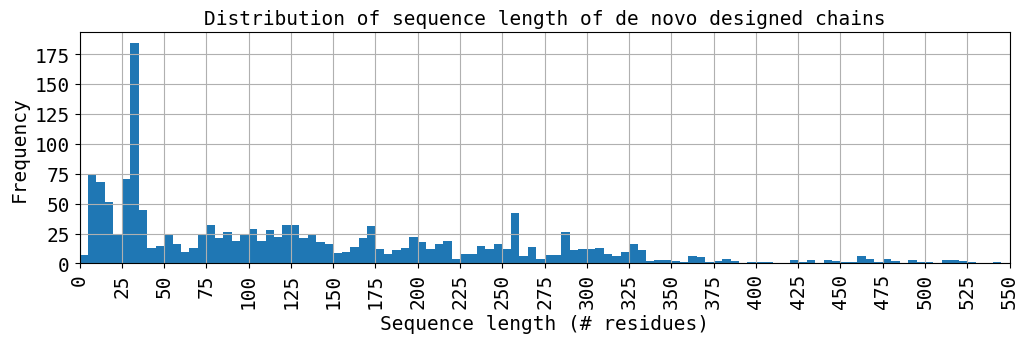

In [66]:
x_lim = 10000
step = 5

# Define the bin edges from 0 to 550 with a width of 5
bins = range(0, x_lim+1, step)  # This creates bins starting at 0 up to 550 with a step of 5
plt.rcParams["font.family"] = "monospace"

# Create a figure with a 3:7 height-to-width ratio
fig = plt.figure(figsize=(12, 3))  # Adjust width and height to maintain the 3:7 ratio

# Set the title and other font sizes to 14
plt.title("Distribution of sequence length of de novo designed chains", fontsize=14)

# Plot the histogram with the specified range and bin width
plt.hist(sequence_lengths, bins=bins, range=(0, x_lim))
plt.grid()

# Set label fontsizes to 14
plt.xlabel("Sequence length (# residues)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Increase the size of the x and y ticks
plt.xticks(range(0, 551, 25), rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Set x-axis limits to remove empty space before 0 and after 550
plt.xlim(0, 550)

# Save the figure with the specified aspect ratio and increased font sizes
plt.savefig("20240823_sequence_distribution.svg", bbox_inches='tight')

plt.show()